## Kekurangan

1. Belum pilih fitur X (data yang diinput atau feature) dan belum pilih fitur y (data output atau hasil).

2. Belum melakukan Data Splitting untuk dimasukkin ke model machine learning.

3. Masih ada beberapa data yang belum di data cleaning dan preprocessing. 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
train = pd.read_csv("train.csv")


# Melihat 5 data teratas
train.head

<bound method NDFrame.head of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849            

In [30]:
print(train.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [31]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [32]:
print(train.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


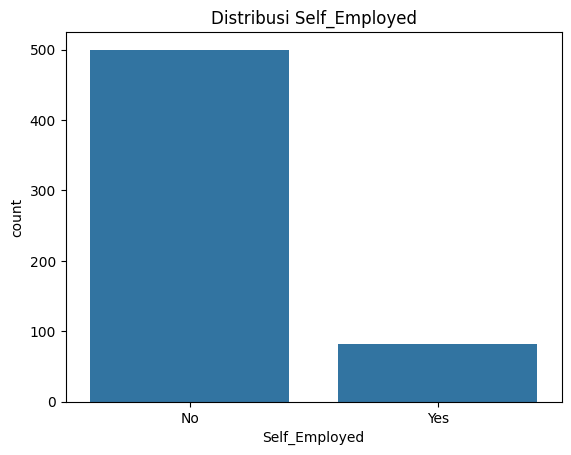

In [33]:
sns.countplot(x='Self_Employed', data=train)
plt.title("Distribusi Self_Employed")
plt.show()

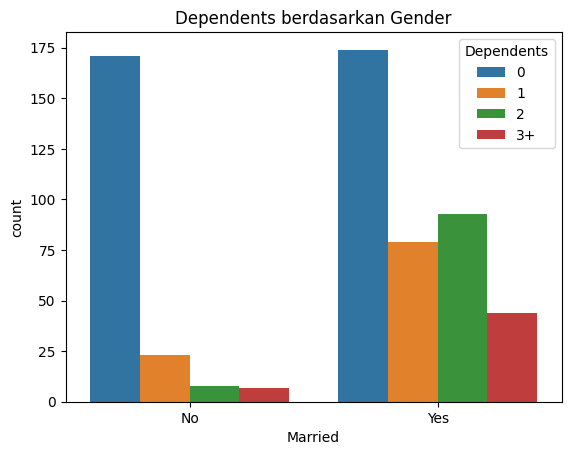

In [34]:
sns.countplot(x='Married', hue='Dependents', data=train)
plt.title("Dependents berdasarkan Gender")
plt.show()

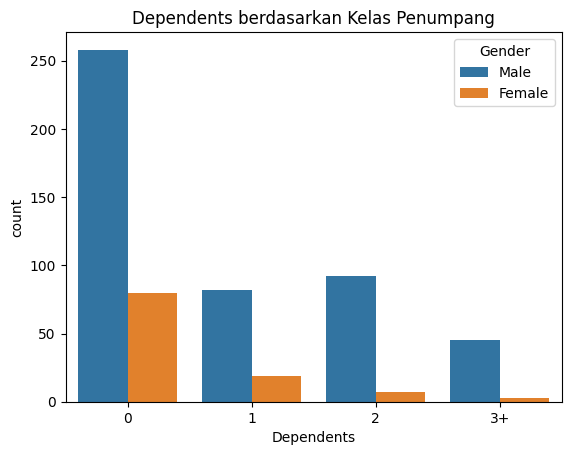

In [35]:
sns.countplot(x='Dependents', hue='Gender', data=train)
plt.title("Dependents berdasarkan Kelas Penumpang")
plt.show()

In [36]:
print(train.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [37]:
print(train[['Gender','Married','Dependents','Education','Self_Employed']].head(10))


  Gender Married Dependents     Education Self_Employed
0   Male      No          0      Graduate            No
1   Male     Yes          1      Graduate            No
2   Male     Yes          0      Graduate           Yes
3   Male     Yes          0  Not Graduate            No
4   Male      No          0      Graduate            No
5   Male     Yes          2      Graduate           Yes
6   Male     Yes          0  Not Graduate            No
7   Male     Yes         3+      Graduate            No
8   Male     Yes          2      Graduate            No
9   Male     Yes          1      Graduate            No


In [ ]:
# perlu diubah menjadi integer karena dia enggak bisa gabungin integer
train['FamilySize'] = train['Gender'] + train['Married'] + 1

TypeError: can only concatenate str (not "int") to str

In [39]:
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])


In [ ]:
# Dependents udah keisi semua
print(train.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [42]:
train['Gender'] = train['Married'].str.extract(r' ([A-Za-z]+)\.', expand=False)
print(train['Self_Employed'].unique())


['No' 'Yes' nan]


In [43]:
train['Self_Employed'] = train['Dependents'].str.extract(r' ([A-Za-z]+)\.', expand=False)


print(train['Self_Employed'].unique())


[nan]


In [44]:
rare_titles = train['Self_Employed'].value_counts()[train['Self_Employed'].value_counts() < 10].index
train['Title'] = train['Self_Employed'].replace(rare_titles, 'Rare')

In [45]:
label_cols = ['Gender','Married','Dependents']
encoders = {}  # simpan encoder per kolom

for col in label_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])  # fit di train
    # transform test hanya untuk kategori yang sudah dikenali
    

In [46]:
drop_cols = ['Gender','Married','Dependents','Education','Self_Employed']
train = train.drop(columns=drop_cols)

In [ ]:
# bikin fitur x dan y nya untuk dimasukkin ke data splitting

In [47]:
# Splitting the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# assume X = features, y = target/label
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(x_train, y_train)   # train
    y_pred = model.predict(x_test)  # predict on test set
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


NameError: name 'X' is not defined

In [ ]:
models = {
    
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(x_train, y_train)   # use variables, not string
    y_pred = model.predict(x_train)
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_train, y_pred))
    print(classification_report(y_train, y_pred))

NameError: name 'x_train' is not defined

In [ ]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)